In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline

[BernoulliRBM] Iteration 1, pseudo-likelihood = -197.97, time = 2.84s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -170.69, time = 4.72s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -153.26, time = 4.21s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -145.89, time = 4.24s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -138.72, time = 4.25s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -132.59, time = 4.15s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -127.79, time = 4.06s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -121.54, time = 4.06s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -118.19, time = 4.05s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -115.88, time = 4.24s


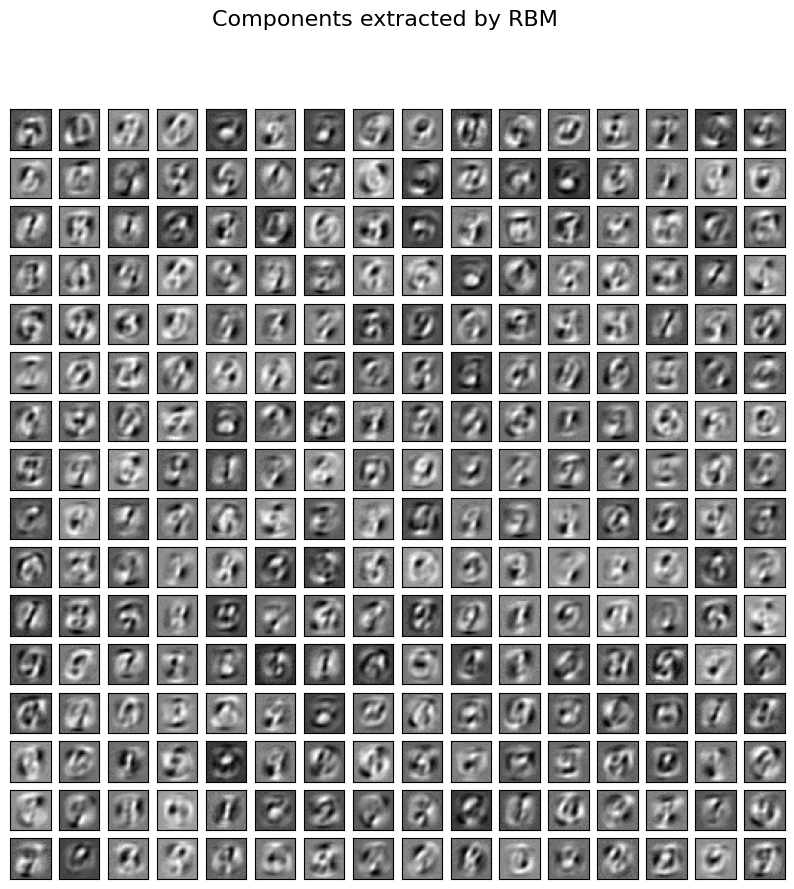

In [3]:
(X, _), (_, _) = mnist.load_data()
X = X.reshape(-1, 784) / 255.

rbm = BernoulliRBM(n_components=256, learning_rate=0.01, batch_size=256, n_iter=10, verbose=1)

rbm_features_classifier = Pipeline(steps=[('rbm', rbm)])

rbm_features_classifier.fit(X)

plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(16, 16, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap='gray')
    plt.xticks(())
    plt.yticks(())

plt.suptitle('Components extracted by RBM', fontsize=16)
plt.show()